In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = "https://raw.githubusercontent.com/marianaav26/FisicaComputacional1/master/Actividad1/diarios.txt"

#Asignamos nombres a las columnas 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

df_diarios = pd.read_csv(url, names= my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")

df_c=df_diarios.copy()

str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)

#Se convierten los datos a valores numericos 
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")

df_c1 = df_c.copy()
#Formato de fecha
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

#Se añade las columnas año y mes
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month

#Se cambia el formato numerico de mes a caracteres 
df_c1.drop("Mes", axis=1, inplace=True)
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

In [6]:
#Para la serie de tiempo
df_c2=df_c1.copy()

#El indice del DataFrame sera la fecha 
df_c2 = df_c2.set_index("Fecha")
print(df_c2.head())

            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1961-04-10     0.0   NaN  28.0   NaN  1961  Apr
1961-04-11     0.0   6.4  28.0  14.0  1961  Apr
1961-04-12     0.0   7.6  31.0   9.5  1961  Apr
1961-04-13     0.0  11.0  30.0   8.5  1961  Apr
1961-04-14     0.0   8.7  30.0   7.0  1961  Apr


In [16]:
#
df_muestra = df_c2[(df_c2["Año"] >= 1960) & (df_c2["Año"] <= 1990)]
df_muestra

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1961-04-10,0.0,NaN,28.0,NaN,1961,Apr
1961-04-11,0.0,6.4,28.0,14.0,1961,Apr
1961-04-12,0.0,7.6,31.0,9.5,1961,Apr
1961-04-13,0.0,11.0,30.0,8.5,1961,Apr
1961-04-14,0.0,8.7,30.0,7.0,1961,Apr
...,...,...,...,...,...,...
1988-05-27,0.0,NaN,33.0,10.0,1988,May
1988-05-28,0.0,NaN,38.0,12.0,1988,May
1988-05-29,0.0,NaN,37.0,11.0,1988,May


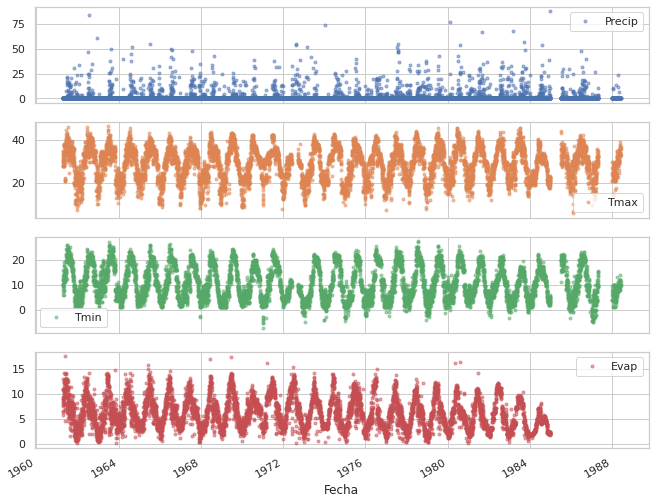

In [17]:
column = ["Precip", "Tmax", "Tmin", "Evap"]
ax_y = ["Precip (mm)", "Evap (mm)", "Tmax (ºC)", "Tmin (ºC)"]

ejes = df_muestra[column].plot(marker=".", alpha=0.5, linestyle ="None", figsize=(11,9), subplots=True)

# Ejercicio 1

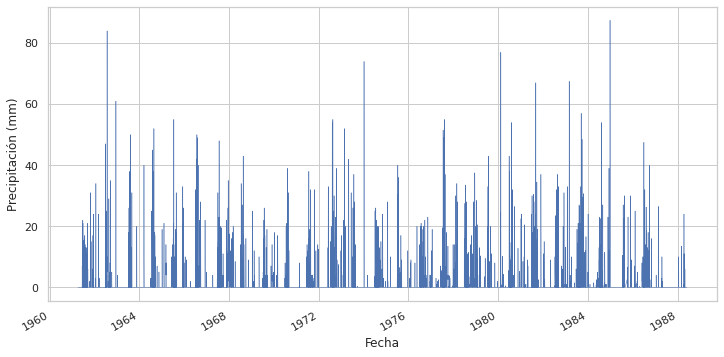

In [18]:
#Grafica de la precipitacion en un rango de 30 años 
plt.figure(figsize=(12,6))
plt.ylabel("Precipitación (mm)")
df_muestra["Precip"].plot(linewidth=0.5);

precip_prom=df_muestra["Precip"].mean()

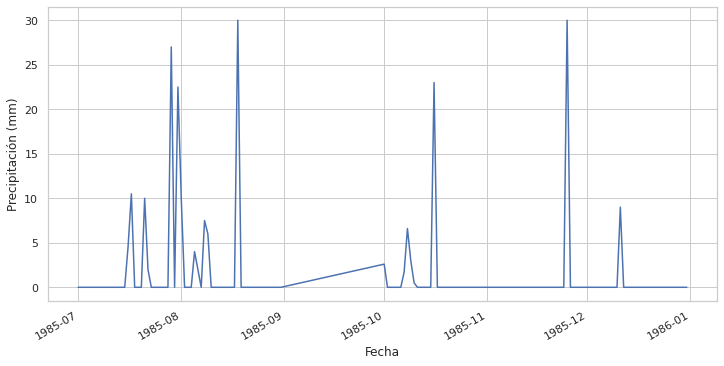

In [19]:
#Grafica de un año de datos
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
df_muestra.loc["1985", "Precip"].plot().set_ylabel("Precipitación (mm)");

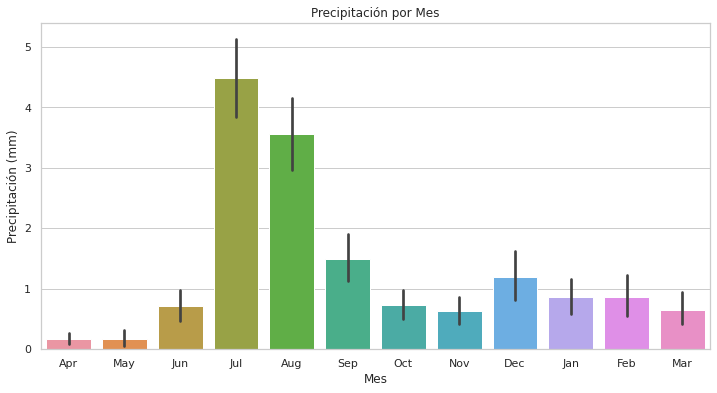

In [20]:
#Grafica por mes
sns.set_style("whitegrid")
sns.barplot(data=df_muestra, y="Precip", x="Mes");
plt.ylabel("Precipitación (mm)");
plt.title("Precipitación por Mes");


# Ejercicio 2

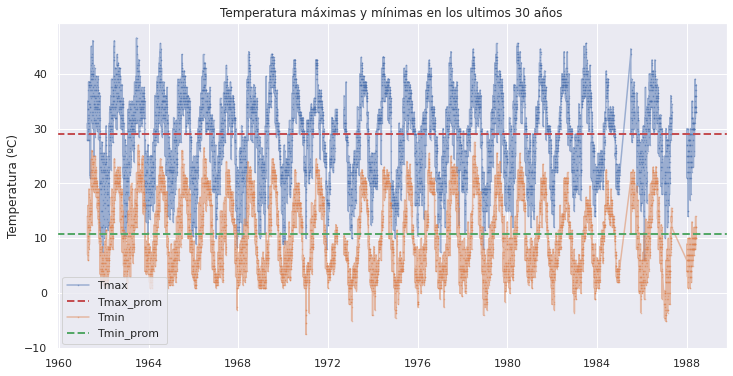

In [21]:
sns.set(rc={'figure.figsize':(12, 6)})
grafica, fig = plt.subplots()
for x in ["Tmax", "Tmin"]:
  fig.plot(df_muestra[x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x)
  if x == "Tmax":
    plt.axhline(y=df_muestra[x].mean(), color="r", linestyle="--", linewidth=2, label="Tmax_prom")
  else:
    plt.axhline(y=df_muestra[x].mean(), color="g", linestyle="--", linewidth=2, label="Tmin_prom")

fig.legend()

fig.set_ylabel("Temperatura (ºC)")
fig.set_title("Temperatura máximas y mínimas en los ultimos 30 años");

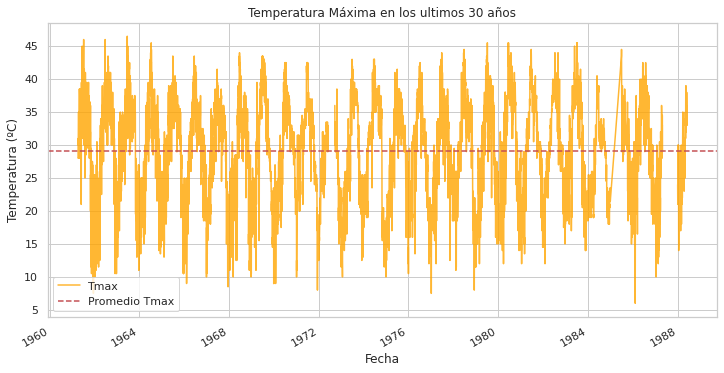

In [22]:
sns.set_style("whitegrid")
tma = df_muestra.Tmax.plot(alpha=0.8, figsize=(12,6), color="orange")
plt.axhline(y=df_muestra.Tmax.mean(), color="r", linestyle="--", label="Promedio Tmax")
tma.set_ylabel("Temperatura (ºC)")

plt.legend()
plt.title("Temperatura Máxima en los ultimos 30 años");

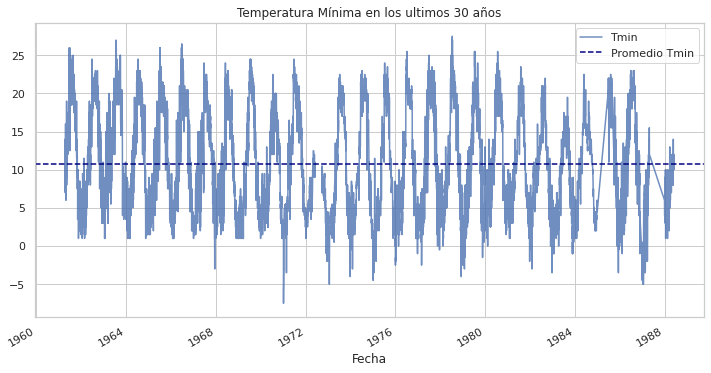

In [24]:
sns.set_style("whitegrid")
tmi = df_muestra.Tmin.plot(alpha=0.8, figsize=(12,6), color="b")
plt.axhline(y=df_muestra.Tmin.mean(), color="navy", linestyle="--", label="Promedio Tmin")
tma.set_ylabel("Temperatura (ºC)")
plt.legend()
#tma.set_title("Temperatura Mínima en los ultimos 36 años");
plt.title("Temperatura Mínima en los ultimos 30 años");

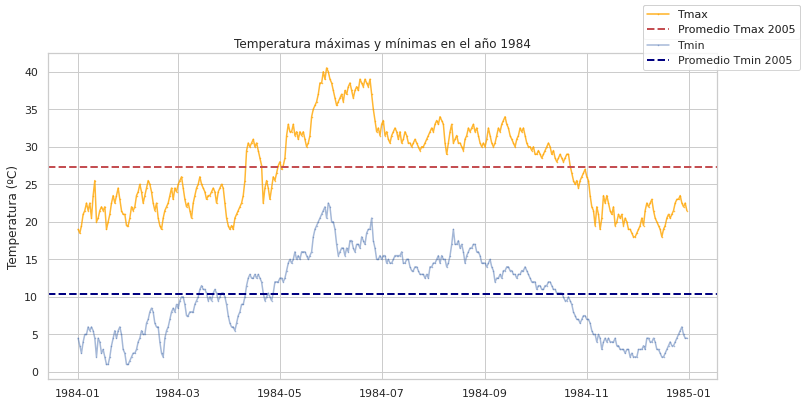

In [27]:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")

start, end ="1984-01", "1984-12"
fig, graf = plt.subplots()
for x in ["Tmax", "Tmin"]:
  if x == "Tmax":
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.8, label=x, color="orange")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="r", linestyle="--", linewidth=2, label="Promedio Tmax 2005")
  else:
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x, color="b")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="navy", linestyle="--", linewidth=2, label="Promedio Tmin 2005")
  fig.legend()
  plt.ylabel("Temperatura (ºC)")
  plt.title("Temperatura máximas y mínimas en el año 1984");
  plt.xlim()

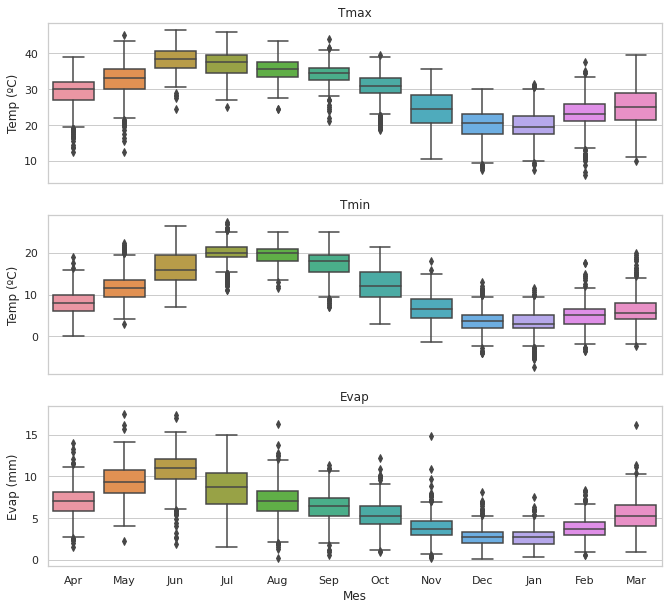

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_muestra, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

# Ejercicio 3

La evaporación promedio es: 6.088658239591751


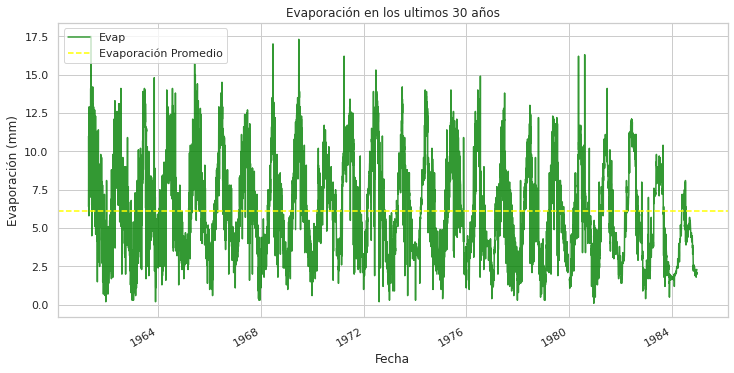

In [29]:
sns.set_style("whitegrid")
a = df_muestra.Evap.plot(alpha=0.8, figsize=(12,6), color="green")
plt.axhline(y=df_muestra.Evap.mean(), linestyle="--", color="yellow", label="Evaporación Promedio")
a.set_ylabel("Evaporación (mm)")
a.set_title("Evaporación en los ultimos 30 años")
plt.legend();
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")

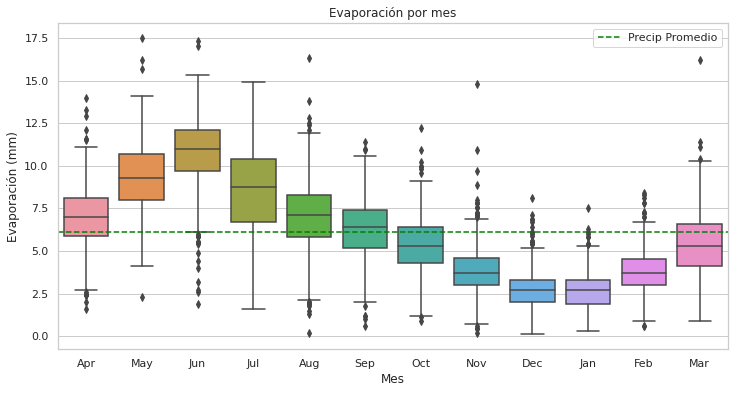

In [38]:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
c = sns.boxplot(data=df_muestra, x="Mes", y="Evap",);
c.set_title("Evaporación por mes")
c.set_ylabel("Evaporación (mm)")
plt.axhline(y=df_muestra.Evap.mean(), color="green", linestyle="--", label= "Precip Promedio")
plt.legend();

In [39]:
columnas=["Evap","Tmax","Tmin"]

df7=df_muestra[columnas].rolling(7, center=True, min_periods=1).mean()
df30=df_muestra[columnas].rolling(30, center=True, min_periods=1).mean()
df365=df_muestra[columnas].rolling(365, center=True, min_periods=1).mean()

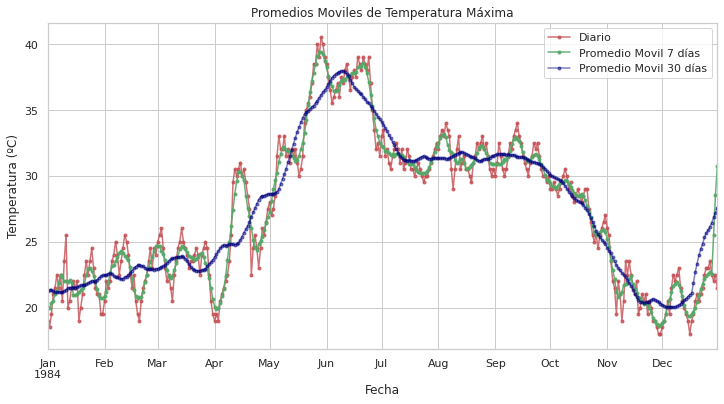

In [41]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["1984", "Tmax"].plot(alpha=0.8, color="r", marker=".", label="Diario");
df7.loc["1984", "Tmax"].plot(alpha=0.9, color="g", marker=".", label="Promedio Movil 7 días");
df30.loc["1984","Tmax"].plot(alpha=0.5, marker=".", color="navy", label="Promedio Movil 30 días")
plt.legend()
plt.ylabel("Temperatura (ºC)")
plt.title("Promedios Moviles de Temperatura Máxima");

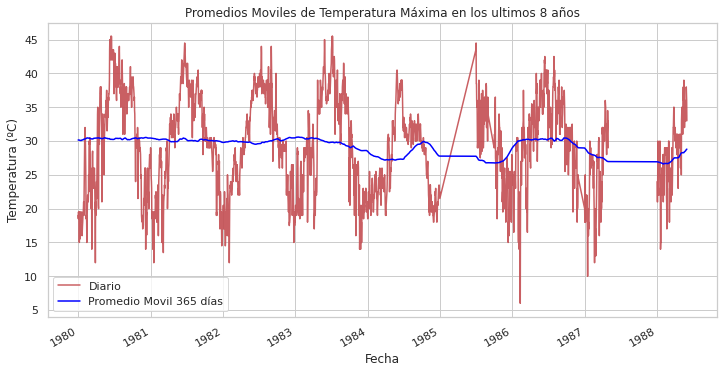

In [44]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid");

df_muestra.loc["1980":"1988", "Tmax"].plot(alpha=0.9, color="r", label= "Diario");
df365.loc["1980":"1988", "Tmax"].plot(alpha=1, color="blue", label="Promedio Movil 365 días", linestyle="-");

plt.legend()
plt.title("Promedios Moviles de Temperatura Máxima en los ultimos 8 años")
plt.ylabel("Temperatura (ºC)");

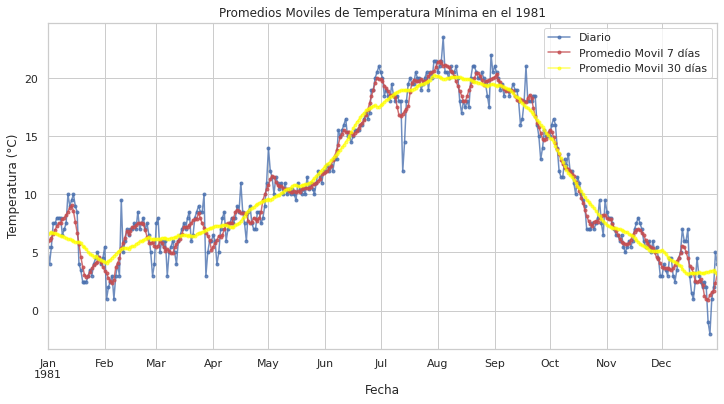

In [45]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["1981", "Tmin"].plot(alpha=0.8, color="b", marker=".", label="Diario")
df7.loc["1981", "Tmin"].plot(alpha=0.8, color="r", marker=".", label="Promedio Movil 7 días");
df30.loc["1981", "Tmin"].plot(alpha=0.6, color="yellow", marker=".", label="Promedio Movil 30 días");

plt.legend()
plt.ylabel("Temperatura (°C)")
plt.title("Promedios Moviles de Temperatura Mínima en el 1981");

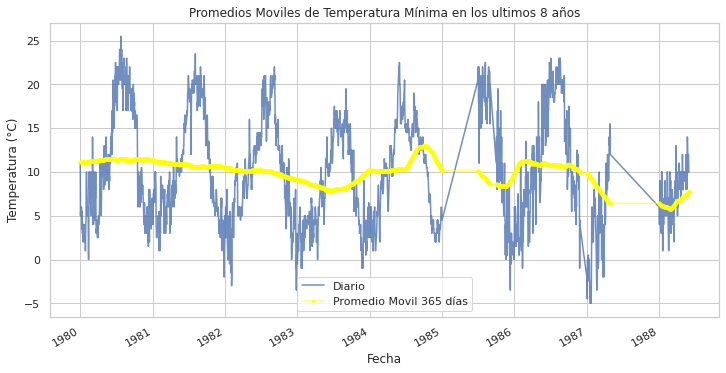

In [47]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["1980":"1988", "Tmin"].plot(alpha=0.8, color="b", label="Diario")
df365.loc["1980":"1988", "Tmin"].plot(alpha=0.6, color="yellow", marker=".", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Temperatura Mínima en los ultimos 8 años")
plt.ylabel("Temperatura (°C)");
plt.legend();

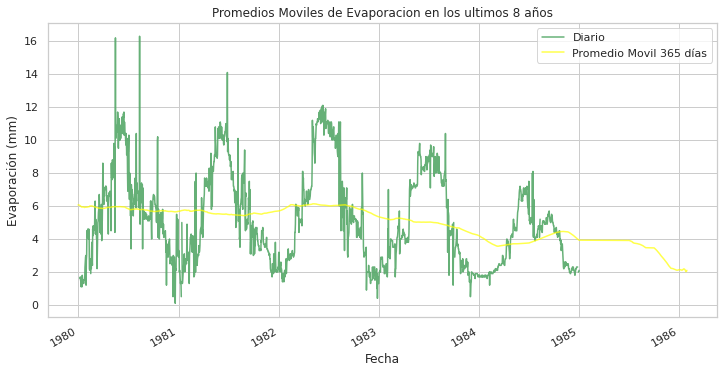

In [51]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["1980":"1988", "Evap"].plot(alpha=0.9, color="g", label="Diario")
df365.loc["1980":"1988", "Evap"].plot(alpha=0.7, color="yellow", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Evaporacion en los ultimos 8 años")
plt.ylabel("Evaporación (mm)")
plt.legend();

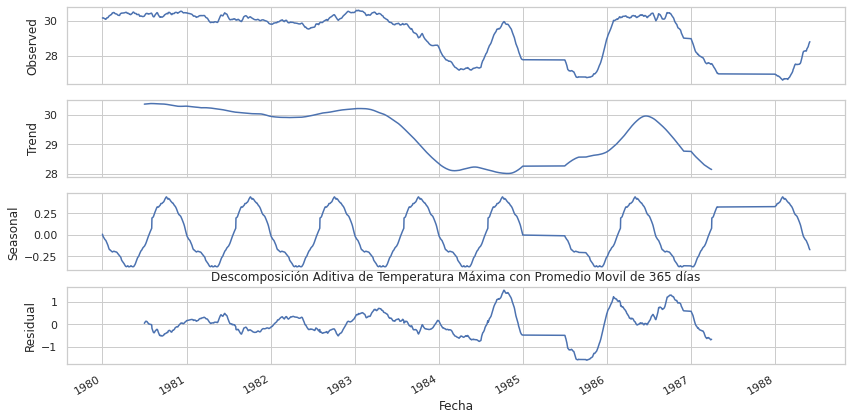

In [52]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "1980", "1988"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df365.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 365 días");


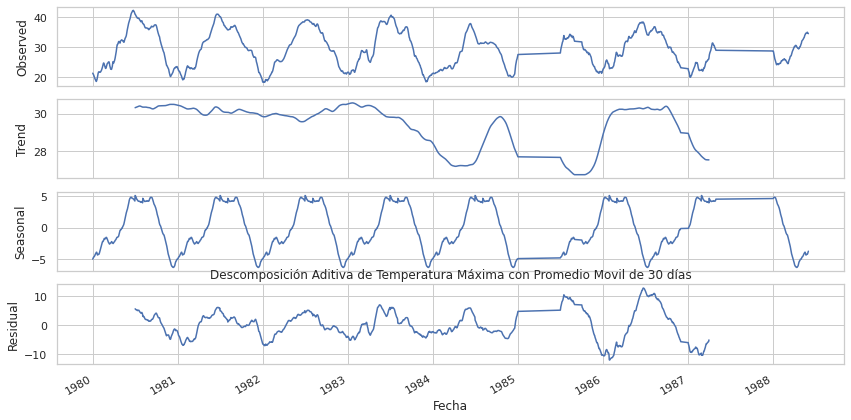

In [53]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "1980", "1988"

# Ciclo anual (por las estaciones)
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df30.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 30 días");

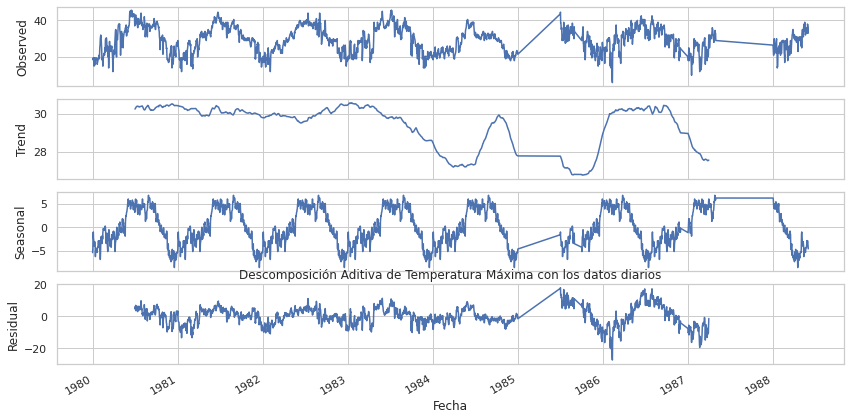

In [54]:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "1980", "1988"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df_muestra.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con los datos diarios");


La temperatura máxima promedio es: 29.045641906397595


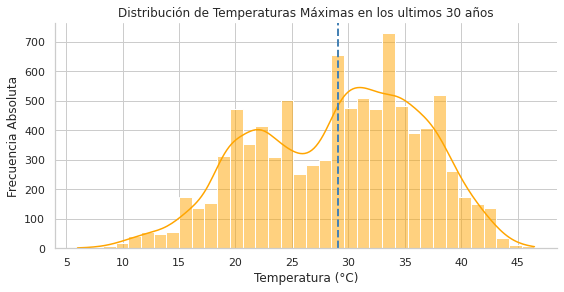

In [55]:
g1 = sns.displot(df_muestra.Tmax, kde=True, color="orange", height=4, aspect=2)
plt.axvline(x=df_muestra.Tmax.mean(), linestyle="--", linewidth=2, color="steelblue");

plt.title("Distribución de Temperaturas Máximas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura máxima promedio es: {df_muestra.Tmax.mean()}")

La temperatura mínima promedio es: 10.752726492056677


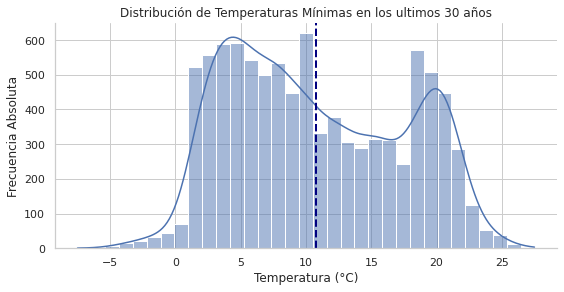

In [56]:
g2 = sns.displot(df_muestra.Tmin, kde=True, height=4, aspect=2)
plt.axvline(x=df_muestra.Tmin.mean(), linestyle="--", linewidth=2, color="navy");

plt.title("Distribución de Temperaturas Mínimas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura mínima promedio es: {df_muestra.Tmin.mean()}")

La evaporación promedio es: 6.088658239591751


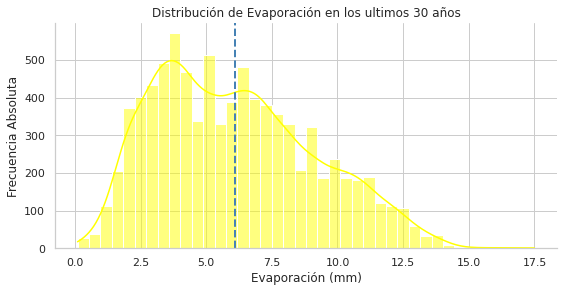

In [57]:
g3 = sns.displot(df_muestra.Evap, kde=True, color="yellow", height=4, aspect=2)
plt.axvline(x=df_muestra.Evap.mean(), linestyle="--", linewidth=2, color="steelblue");

plt.title("Distribución de Evaporación en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Evaporación (mm)");
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")